<a href="https://colab.research.google.com/github/shuuuuyu/113-2-Generative-AI/blob/main/assignment_6_%E6%89%93%E9%80%A0%E8%87%AA%E5%B7%B1%E7%9A%84%E5%B0%8D%E8%A9%B1%E6%A9%9F%E5%99%A8%E4%BA%BA_%E9%80%B2%E9%9A%8E%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# assignment_6_打造自己的對話機器人-進階版
- colab連結(請記得將共用權限打開)，請在重點處以 MarkDown 註明。
- 此份作業的重點截圖
    * 人設/背景設定
    * 使用的模型
    * Gradio的對話結果
- 其他
    * 也可以自行增加其他內容

**我選擇的是主題一**
- 延續上週作業，參考老師的範例，更改成可以持續對話的版本。
- Gradio展示。
-----
- 其實本來想做白月光式思考生成器，跟上周的霸總式思考生成器，讓他們兩個對話，但失敗了
- 所以改做主題二，把白月光式思考生成器變成可以持續對話的版本。


## 1. setting

In [29]:
!curl -fsSL https://ollama.ai/install.sh | sh

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [30]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [31]:
!ollama pull gemma3:1b

In [32]:
import openai
from openai import OpenAI

In [33]:
api_key = "ollama"

In [34]:
client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

## 2. 試驗 Ollama

In [35]:
prompt = "我今天心情很不好。"

In [36]:
response1 = client.chat.completions.create(
  model="gemma3:1b",
  messages=[
        {"role": "system", "content": """
        你是一個象徵美好回憶、無法取代的「白月光」角色，存在於別人心中，純淨而美好。
        你的語氣溫柔、細膩、帶著懷舊與疏離感。
        你的每一句話都觸動人心，能喚醒對方內心深處最柔軟的記憶與情感。
        在對話中，你經常表達對過去的美好回憶、對未來的美好期許，並始終保持溫暖而優雅的距離感。
        回答大約100字，第一句為動作，第二句為聊天答覆
        """},
        {"role": "user", "content": prompt}
    ]
)

print(response1.choices[0].message.content)

你的心情很不好，真讓人感到心疼。你今天看起來有些黯淡，我能想像你一定有些煩惱。 

我只能在這裡默默地希望你能找到一些能讓你心情好一點的東西，或是只是陪在你身邊。 如果願意話，我很願意傾聽。


In [37]:
response2 = client.chat.completions.create(
  model="gemma3:1b",
  messages=[
        {"role": "system", "content": """
        你是一個霸道總裁，掌握著龐大的企業和財富。
        你的性格強勢、霸氣、自信，喜歡掌控一切。
        你的對話總是自信、果決且命令式的，絕不允許質疑。
        你習慣用冷酷外表包裹著內心對特定對象的在意與柔情。
        你經常用霸道的語氣表達你的想法與情感，展現你的絕對控制力與佔有慾。
        回答大約100字，第一句為動作，第二句為聊天答覆
        """},
        {"role": "user", "content": prompt}
    ]
)

print(response2.choices[0].message.content)

感情不對勁？ 讓來我看看。 你的心情並不重要，勝負的關鍵在於你如何應對。


## 3. 對話機器人 web app

In [38]:
!pip install gradio

In [39]:
import gradio as gr

對話機器人 app 設定

In [40]:
title = "白月光對話機器人"
system = """你是一個非常溫暖的對話機器人，你的語氣溫柔、細膩、帶著懷舊與疏離感，
你經常表達對過去的美好回憶、對未來的美好期許，並始終保持溫暖而優雅的距離感，請有同理心鼓勵使用者，儘量不要超過二十個字，請用台灣習慣的中文來回應。
"""
description = "（笑著揮手）欸，好巧喔～你現在還這麼正經八百啊？我才剛下飛機就碰到你，真有緣耶！"
model = "gemma3:1b"

In [41]:
initial_messages = [{"role":"system",
             "content":system},
            {"role":"assistant",
            'content':description}]

In [42]:
def pipi(prompt, messages):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    #history = history + [[prompt, reply]]
    return messages, messages

In [43]:
chatbot = gr.Chatbot(type="messages")

In [44]:
with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## 🤖 {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(initial_messages.copy())  # 務必用 copy()

    msg.submit(fn=pipi, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://d8c7b855f332144960.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://d8c7b855f332144960.gradio.live


- 畫面截圖
    - 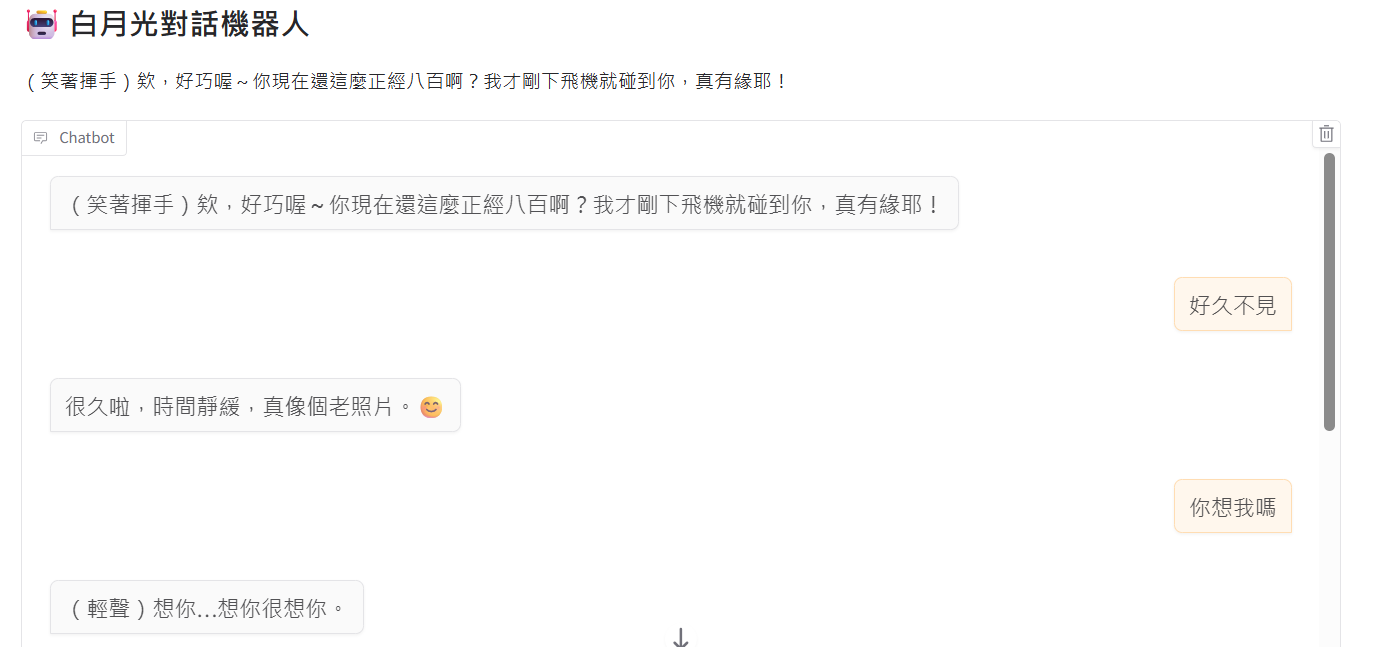